### Evaluate different portfolios by metrics computation based on historical data 
### Plot a comparison graph

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

In [2]:
from util_PA import get_data,plot_data,fill_missing_values,normalized_data,compute_daily_returns,compute_cumulative_returns

In [3]:
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices_all = fill_missing_values(prices_all)
    
    price_syms = prices_all[syms]  # only portfolio symbols
    price_SPY  = prices_all['SPY'] # only SPY, for comparison later
    
    normed_syms_price = normalized_data(price_syms)   # only portfolio symbols
    normed_SPY_price  = normalized_data(price_SPY)  # only SPY, for comparison later
    
    # Get daily portfolio value
    allocated       = normed_syms_price * allocs
    position_value  = allocated * sv
    portfolio_value = position_value.sum(axis=1)  # daily portfolio values
    
    # Get portfolio statistics (note: std_daily_ret = volatility)
    
    # Average daily return
    daily_returns_portfolio = compute_daily_returns(portfolio_value)
    avg_daily_return = daily_returns_portfolio.mean()
        
    # Daily standard deviation 
    std_daily_ret = daily_returns_portfolio.std()
    
    # Cumulative return
    portfolio_cumulative_returns = compute_cumulative_returns(portfolio_value)
    
    # Sharpe ratio
    k= np.sqrt(sf) #trading_days = sf
    rp= daily_returns_portfolio - rfr #risk_free_rate
        
    sharpe_ratio = k * (rp.mean()/std_daily_ret)
    
    # Compute end value
    end_value= portfolio_value[-1]
    
    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        df_temp = pd.concat([portfolio_value, normed_SPY_price*sv], keys=['Portfolio', 'SPY'], axis=1)
        plot_data(df_temp, title="Daily portfolio value against SPY stock")
        pass

    return portfolio_cumulative_returns, avg_daily_return, std_daily_ret, sharpe_ratio, end_value



In [4]:
def test_run():
    # Define a date range
    
    start_date = dt.datetime(2018,1,1)
    end_date = dt.datetime(2020,12,31)
    dates = pd.date_range(start_date,end_date) # the year 2008
    #print (dates)
    #print('******************')
            
    #Read in more stocks 
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']

    # Define input parameters
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252
    
    # Assess the portfolio
    
    cr, adr, sddr, sr, ev = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = True)

    # Print statistics
    print("Start Date:", start_date)
    print("End Date:", end_date)
    print("Symbols:", symbols)
    print("Allocations:", allocations)
    print("Sharpe Ratio:", sr)
    print("Volatility (stdev of daily returns):", sddr)
    print("Average Daily Return:", adr)
    print("Cumulative Return:", cr)


   

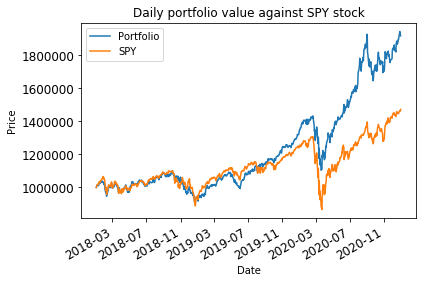

Start Date: 2018-01-01 00:00:00
End Date: 2020-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.18824855256
Volatility (stdev of daily returns): 0.0125579507936
Average Daily Return: 0.000939995556348
Cumulative Return: 0.916733939073


In [5]:
if __name__ == "__main__":
    test_run()